In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
6/17/20        1871   22597      11251       1823         4066     10299   
6/18/20        1939   23351      11868       1823         4200     10739   
6/19/20        2058   24274      12509       1823         4329     11258   
6/20/20        2127   25222      12755       1823         4475     12306   
6/21/20        2213   26030      13145       1823         4626     12769   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
6/17/20               24105      626                  123  2280  
6/18/20               24645      638                  123  2295  
6/19/20               25068      652                  123  2305  
6/20/20               25778      657                  123  2309  
6/21/20               26677      659                  123  2312  

[114 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

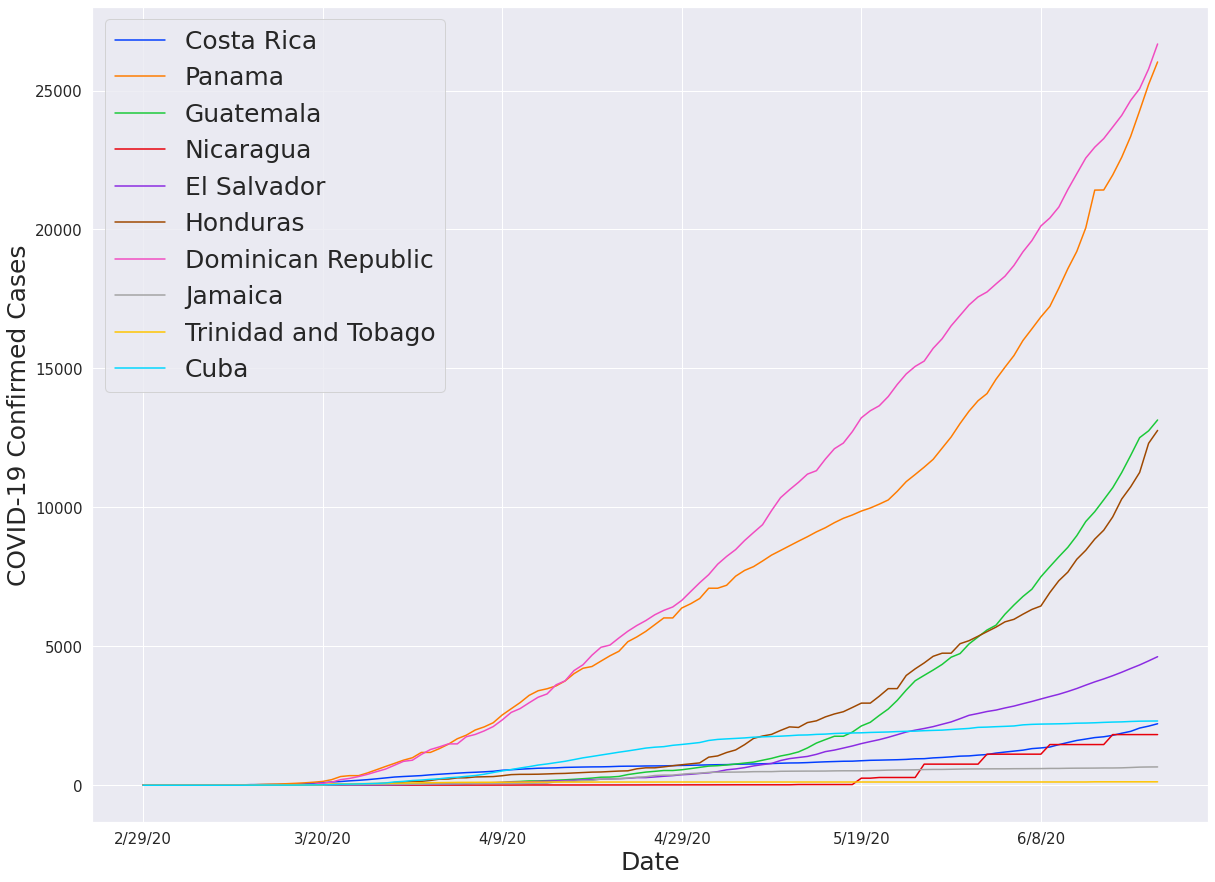

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

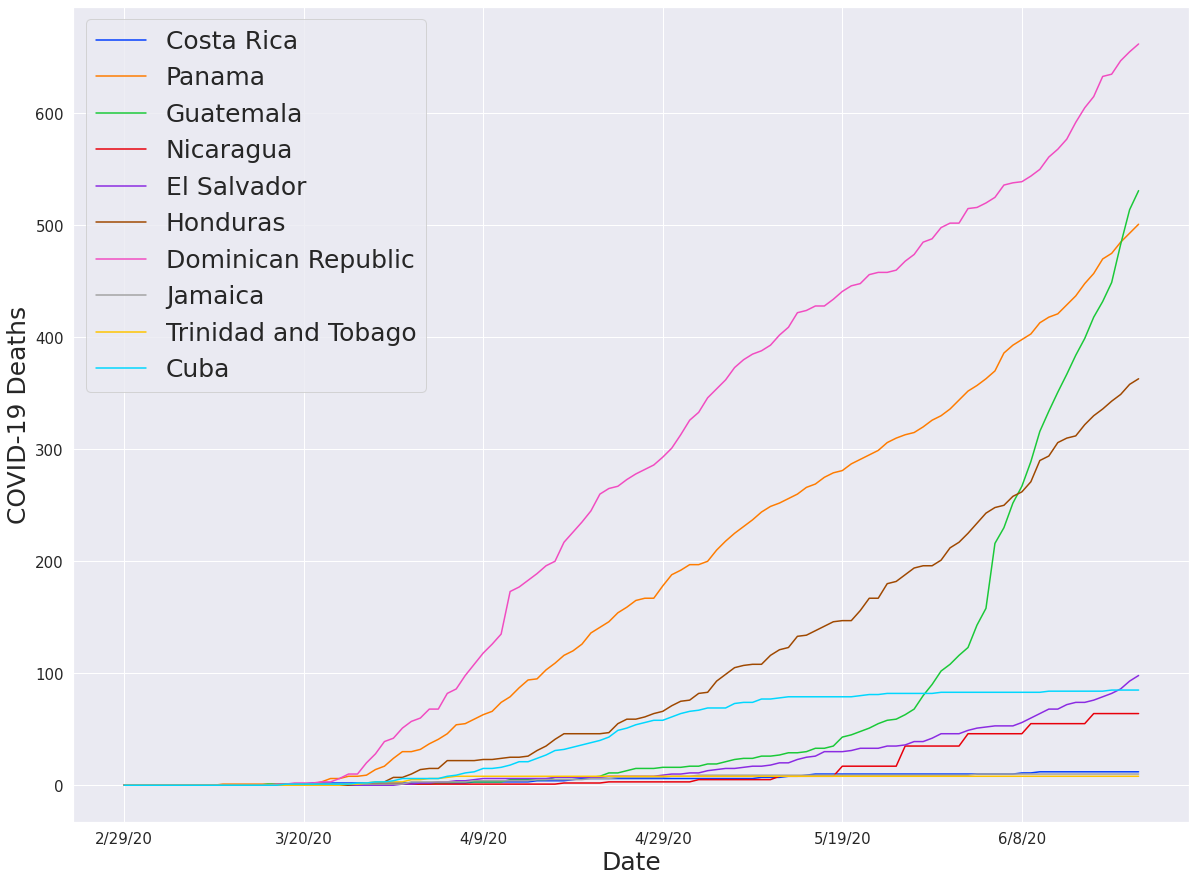

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20          0.0     0.0        0.0        0.0          0.0       0.0   
...             ...     ...        ...        ...          ...       ...   
6/17/20        75.0   635.0      545.0        0.0        125.0     643.0   
6/18/20        68.0   754.0      617.0        0.0        134.0     440.0   
6/19/20       119.0   923.0      641.0        0.0        129.0     519.0   
6/20/20        69.0   948.0      246.0        0.0        146.0    1048.0   
6/21/20        86.0   808.0      390.0        0.0        151.0     463.0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                  1.0      0.0                  0.0   0.0  
3/2/20                  0.0      0.0                  0.0   0.0  
3/3/20                  0.0      0.0                  0.0   0.0  
3/4/20                  0.0      0.0                  0.0   0.0  
3/5/20                  0.0      0.0                  0.0   0.0  
...                     ...      ...                  ...   ...  
6/17/20               419.0      5.0                  0.0   7.0  
6/18/20               540.0     12.0                  0.0  15.0  
6/19/20               423.0     14.0                  0.0  10.0  
6/20/20               710.0      5.0                  0.0   4.0  
6/21/20               899.0      2.0                  0.0   3.0  

[113 rows x 10 columns]

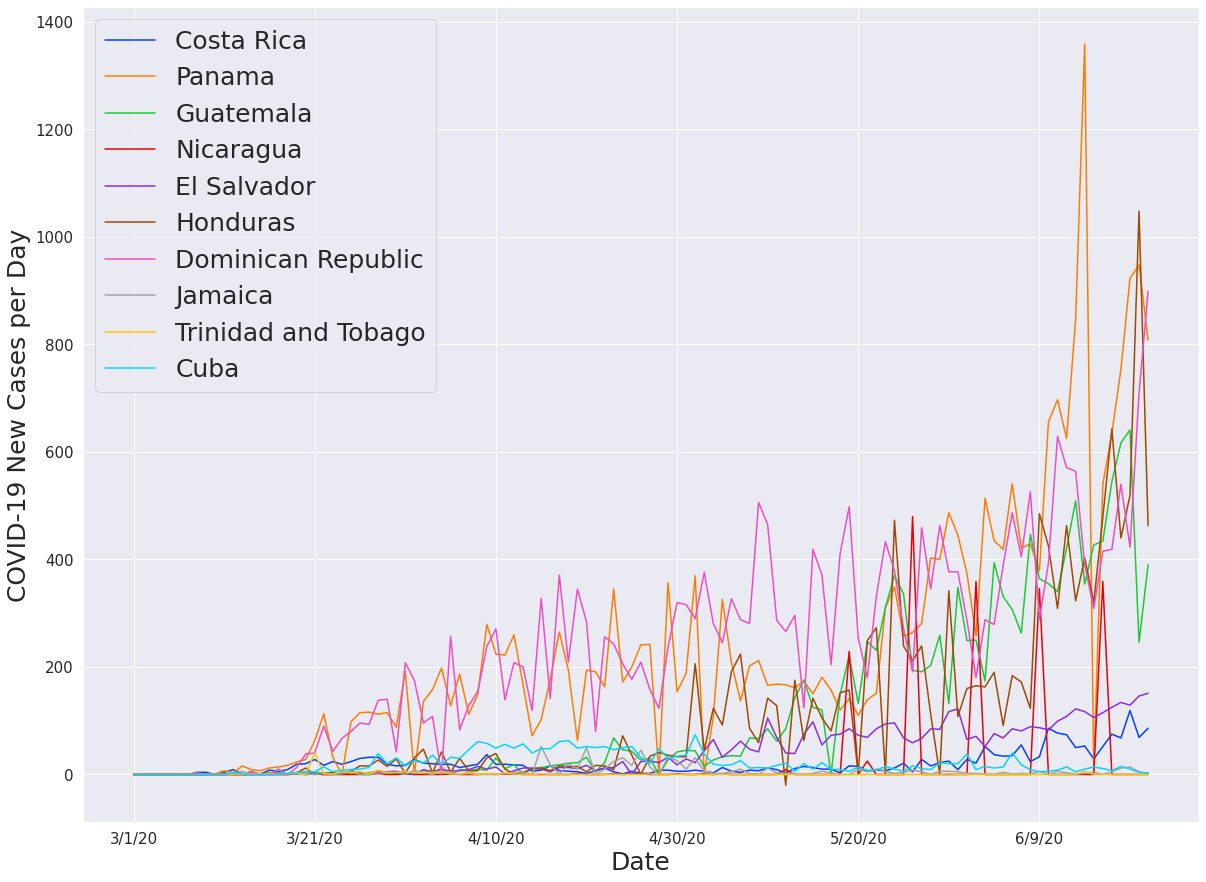

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

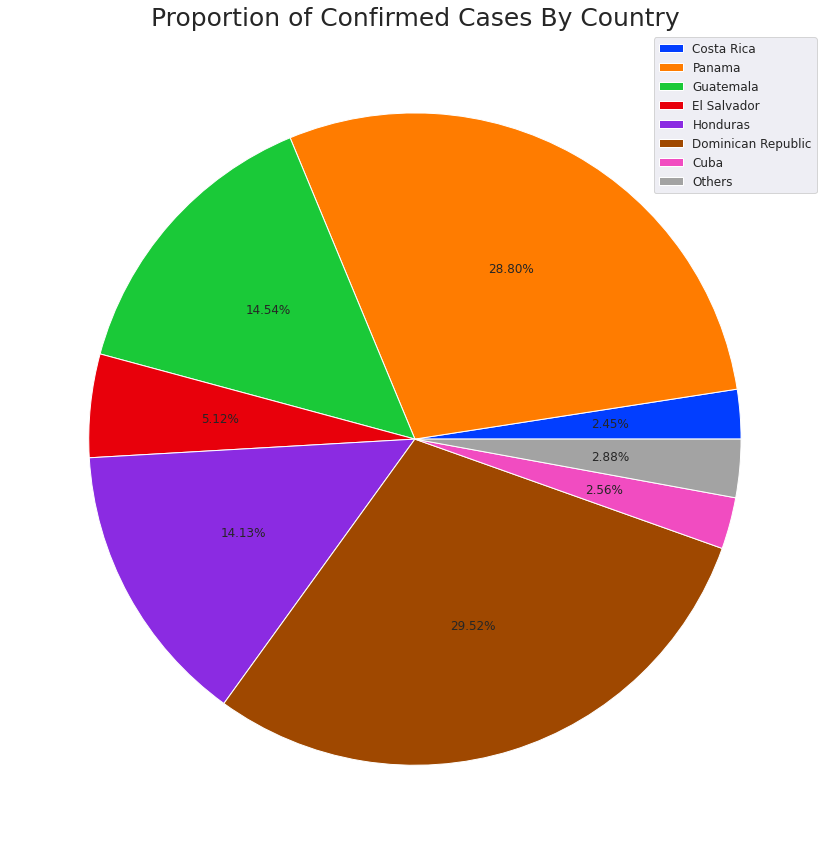

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

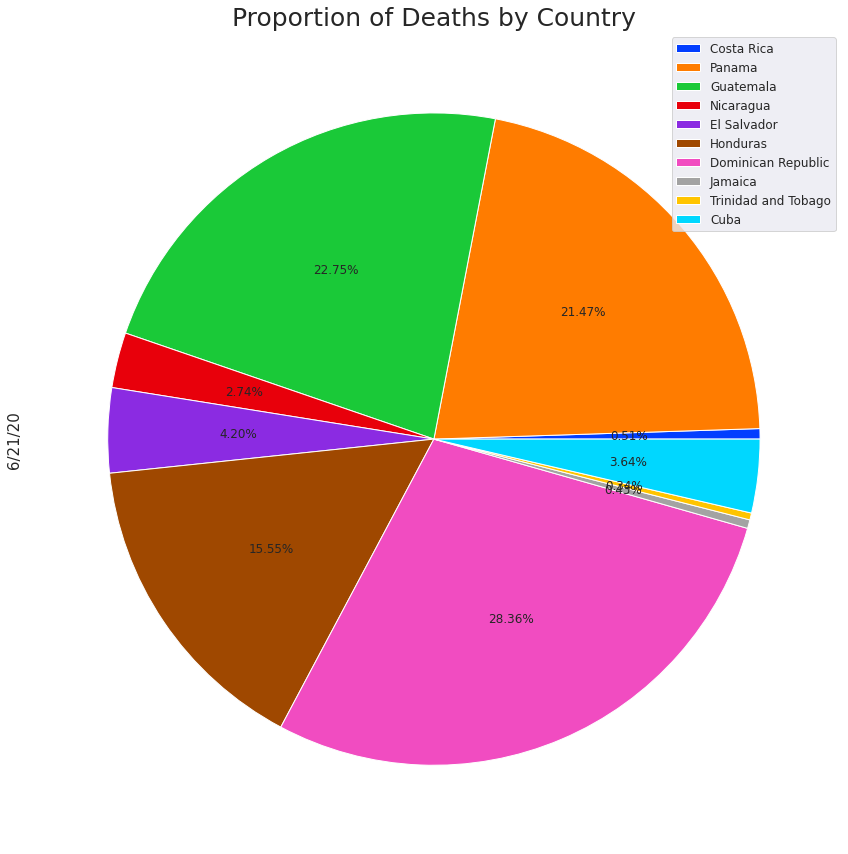

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
6/17/20    1.041759  1.028914   1.050906        1.0     1.031718  1.066591   
6/18/20    1.036344  1.033367   1.054840        1.0     1.032956  1.042723   
6/19/20    1.061372  1.039527   1.054011        1.0     1.030714  1.048329   
6/20/20    1.033528  1.039054   1.019666        1.0     1.033726  1.093089   
6/21/20    1.040433  1.032036   1.030576        1.0     1.033743  1.037624   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000                  0.0  0.000000  
3/1/20             0.000000  0.000000                  0.0  0.000000  
3/2/20             1.000000  0.000000                  0.0  0.000000  
3/3/20             1.000000  0.000000                  0.0  0.000000  
3/4/20             1.000000  0.000000                  0.0  0.000000  
...                     ...       ...                  ...       ...  
6/17/20            1.017690  1.008052                  1.0  1.003080  
6/18/20            1.022402  1.019169                  1.0  1.006579  
6/19/20            1.017164  1.021944                  1.0  1.004357  
6/20/20            1.028323  1.007669                  1.0  1.001735  
6/21/20            1.034875  1.003044                  1.0  1.001299  

[114 rows x 10 columns]

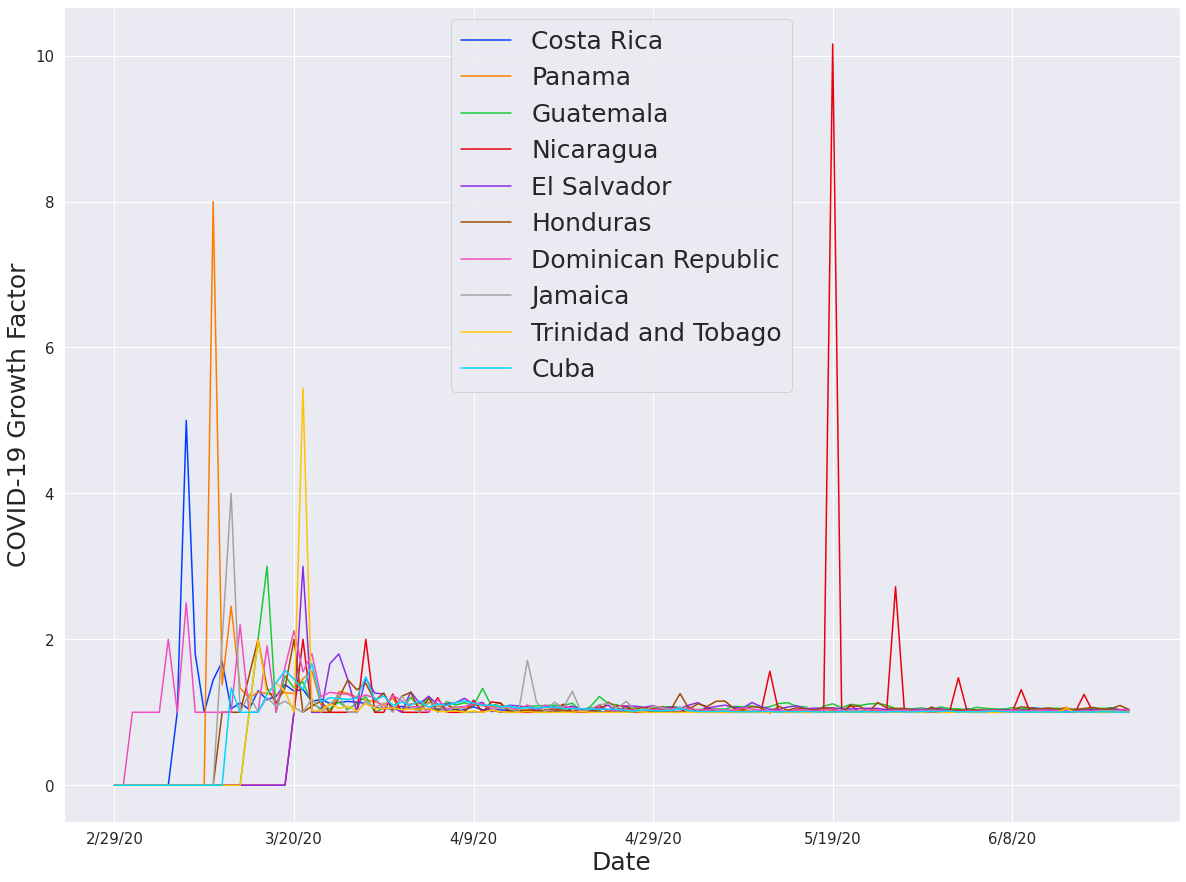

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  114.000000  114.000000  114.000000  114.000000   114.000000   
mean     1.033905    1.046725    0.967162    0.965385     0.913652   
std      0.469597    0.749713    0.433080    0.985083     0.473011   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.008908    1.019401    1.032687    1.000000     1.024795   
50%      1.023521    1.033497    1.056876    1.000000     1.042837   
75%      1.047851    1.075272    1.093202    1.000000     1.079042   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  114.000000          114.000000  114.000000           114.000000   
mean     0.982885            1.095383    0.972333             0.932713   
std      0.371252            0.293084    0.451184             0.561303   
min      0.000000            0.000000    0.000000             0.000000   
25%      1.015784            1.017381    1.000000             1.000000   
50%      1.042333            1.030842    1.007007             1.000000   
75%      1.083934            1.065727    1.061491             1.008677   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  114.000000  
mean     0.951582  
std      0.362423  
min      0.000000  
25%      1.004238  
50%      1.010866  
75%      1.070732  
max      1.666667

In [17]:
growth_df.mean()

Costa Rica             1.033905
Panama                 1.046725
Guatemala              0.967162
Nicaragua              0.965385
El Salvador            0.913652
Honduras               0.982885
Dominican Republic     1.095383
Jamaica                0.972333
Trinidad and Tobago    0.932713
Cuba                   0.951582
dtype: float64

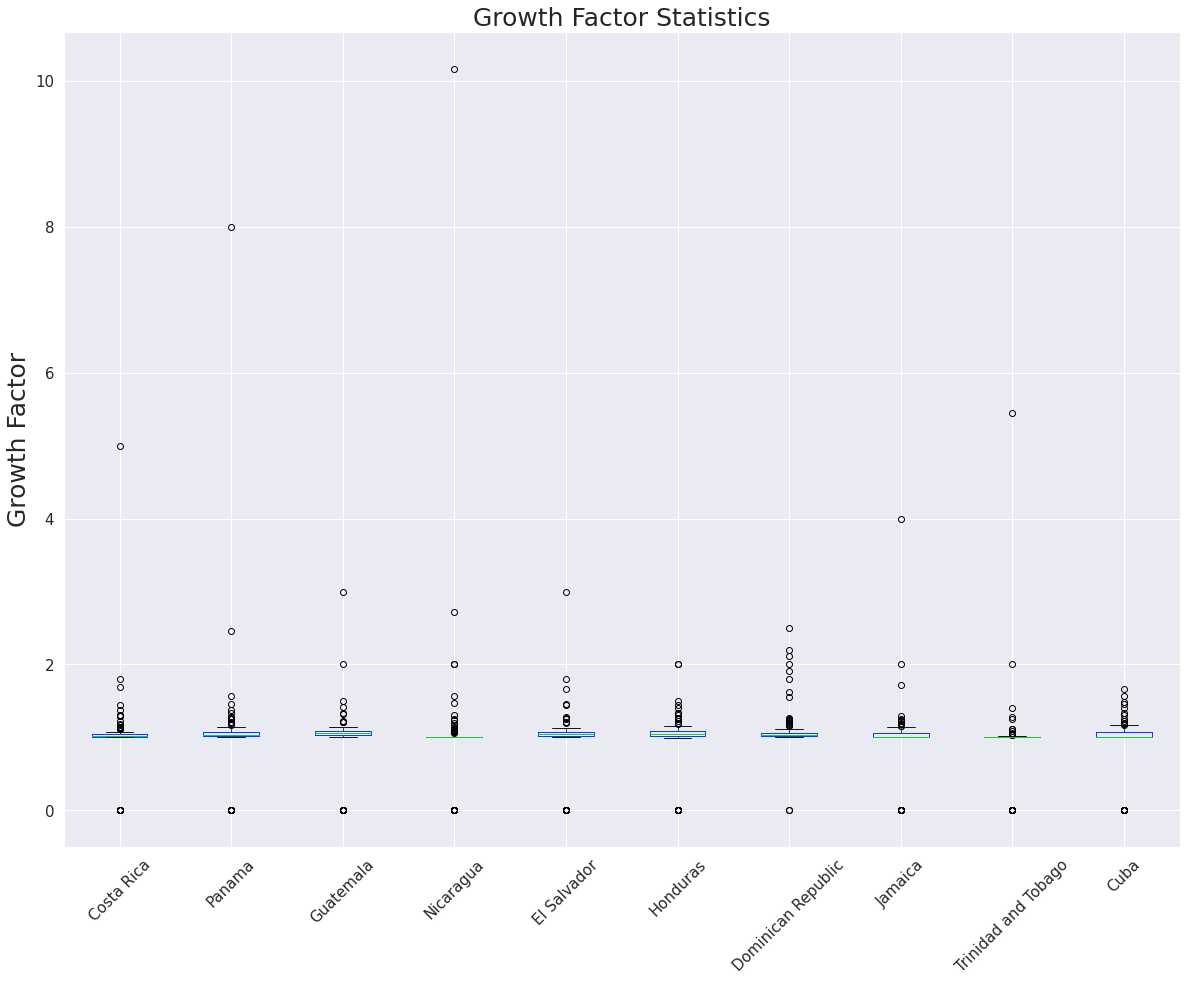

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

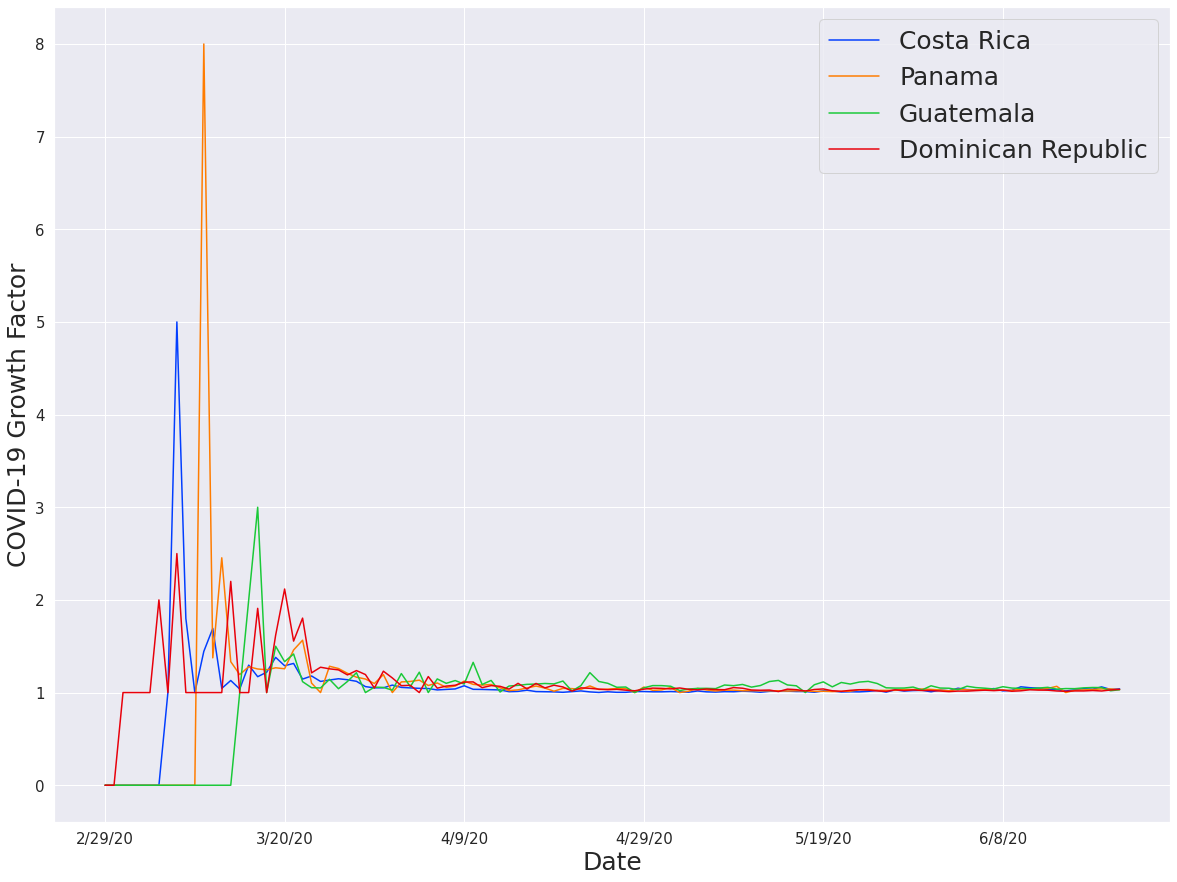

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica      Panama  Guatemala  Nicaragua  El Salvador    Honduras  \
count  107.000000  103.000000  99.000000  94.000000    94.000000  102.000000   
mean     1.101544    1.158511   1.113701   1.170787     1.108046    1.098519   
std      0.399842    0.701362   0.226716   0.967475     0.232684    0.160998   
min      1.000000    1.000000   1.000000   1.000000     1.000000    0.990476   
25%      1.010739    1.023876   1.046362   1.000000     1.031793    1.026618   
50%      1.026515    1.036467   1.063830   1.000000     1.053913    1.047996   
75%      1.050730    1.088016   1.100000   1.000000     1.087995    1.091119   
max      5.000000    8.000000   3.000000  10.160000     3.000000    2.000000   

       Dominican Republic     Jamaica  Trinidad and Tobago        Cuba  
count          112.000000  102.000000            99.000000  101.000000  
mean             1.114943    1.086725             1.074034    1.074063  
std              0.255814    0.319702             0.458207    0.124732  
min              1.000000    1.000000             1.000000    1.000000  
25%              1.017797    1.001674             1.000000    1.005604  
50%              1.030924    1.009685             1.000000    1.015267  
75%              1.068062    1.066667             1.009272    1.093750  
max              2.500000    4.000000             5.444444    1.666667

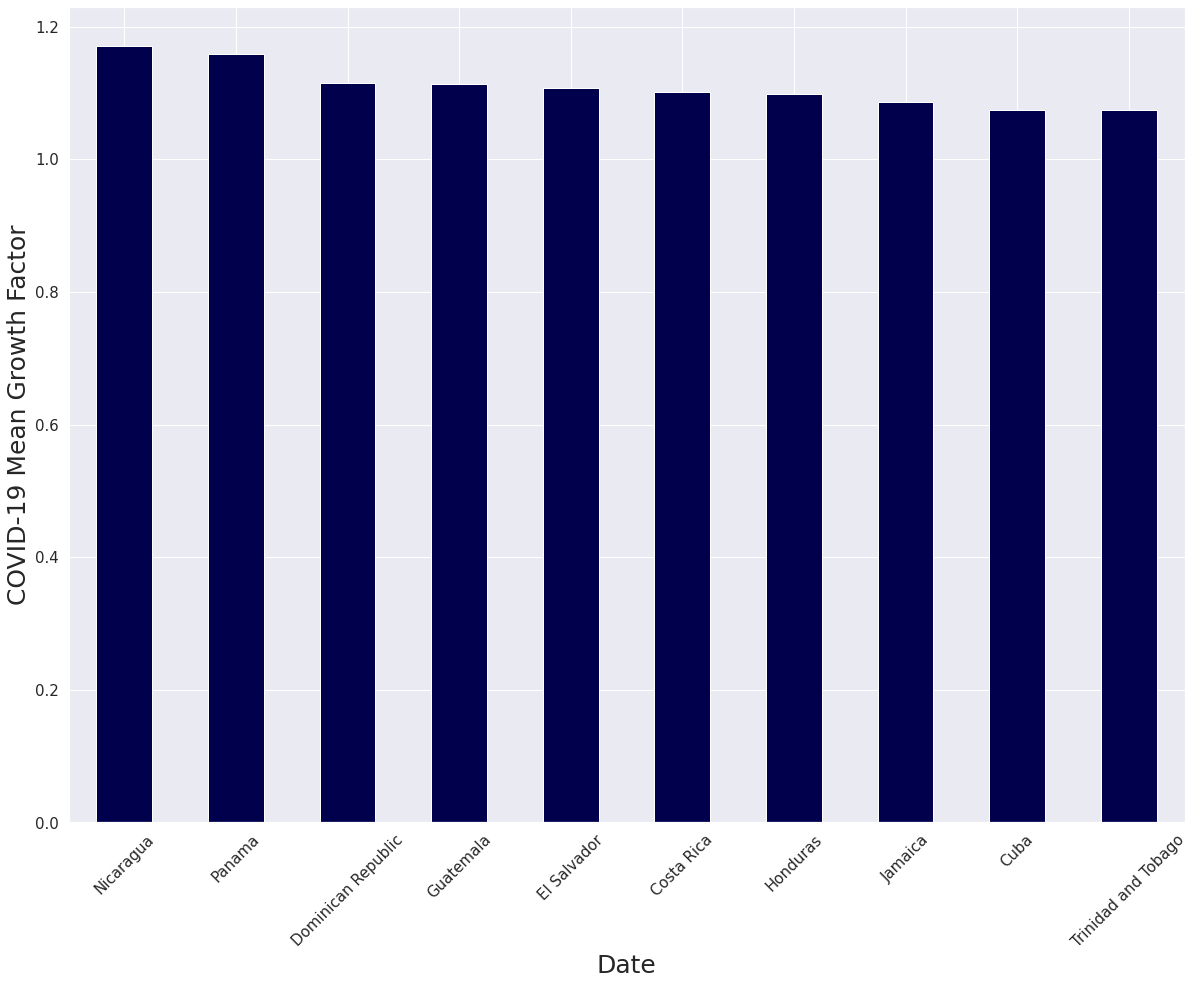

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

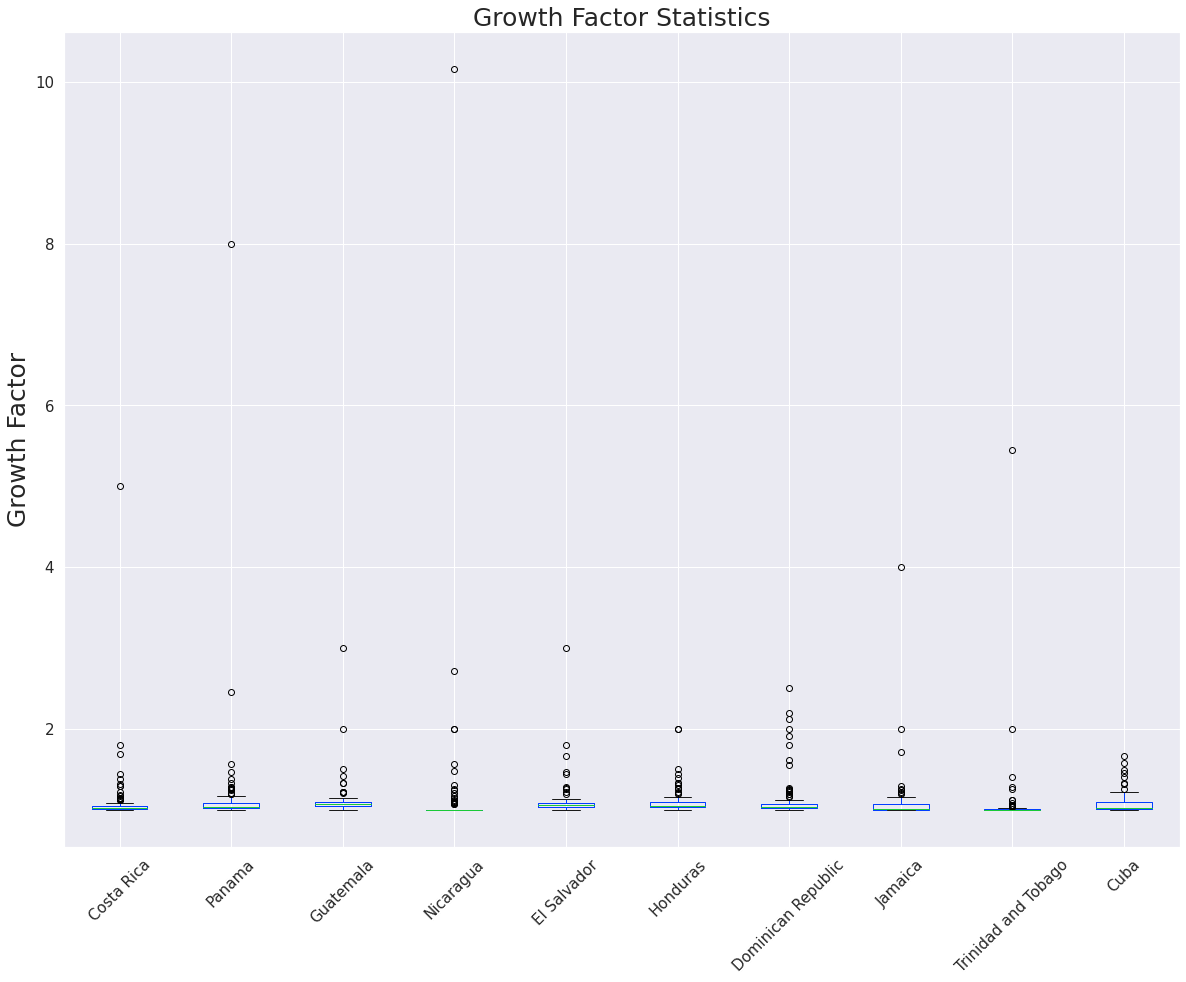

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

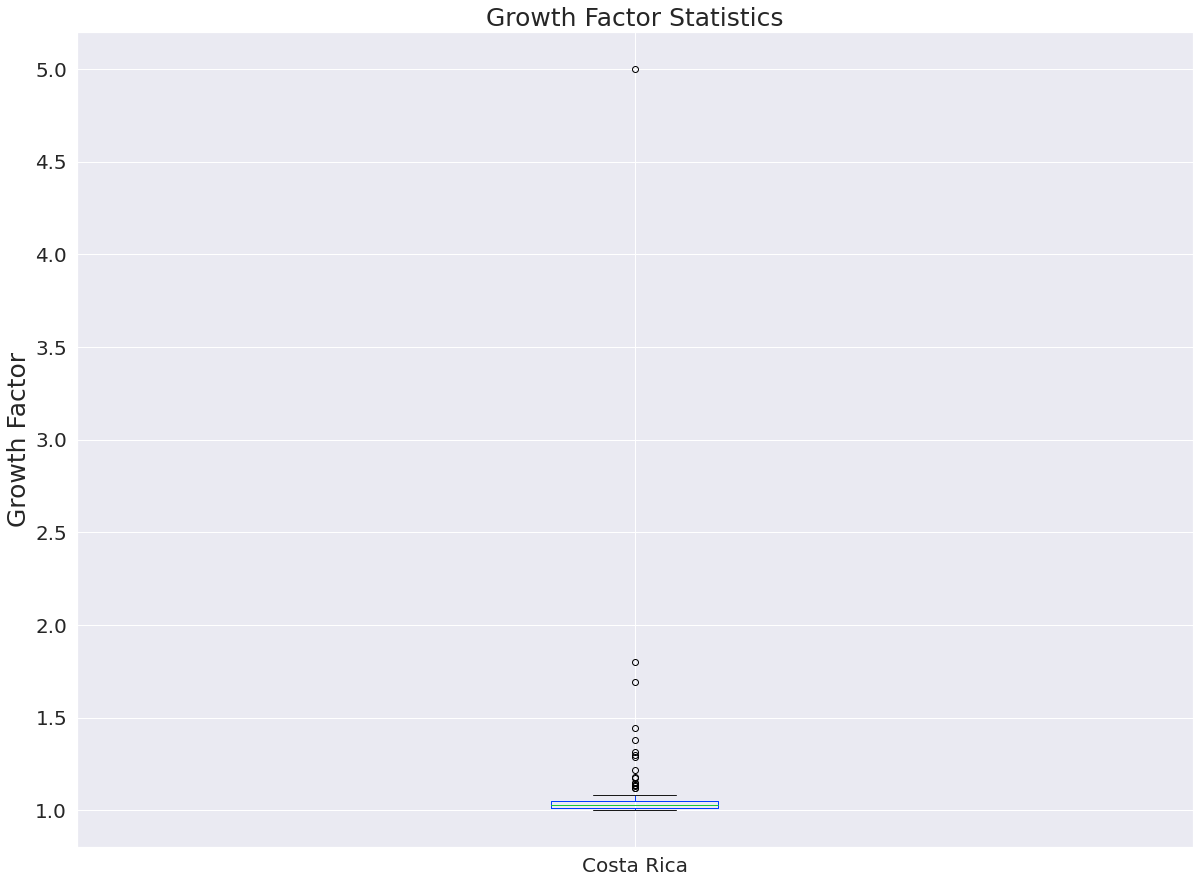

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()